In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/Cantonment day.csv')

In [4]:
df.head()

,a,b,c,y,ds
0,2015,1,1,3.02,01-01-2015
1,2015,1,2,0.06,02-01-2015
2,2015,1,3,0.00,03-01-2015
3,2015,1,4,0.00,04-01-2015
4,2015,1,5,0.00,05-01-2015


In [5]:
df.drop(['c','b','a'],axis=1,inplace=True)

In [8]:
df['ds'] = pd.to_datetime(df.ds,infer_datetime_format=True)
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')
df.head()

,y,ds
0,3.02,2015-01-01
1,0.06,2015-02-01
2,0.00,2015-03-01
3,0.00,2015-04-01
4,0.00,2015-05-01


In [9]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(df)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpks3hbfk_/g8qshi9a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpks3hbfk_/gavxsy2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57700', 'data', 'file=/tmp/tmpks3hbfk_/g8qshi9a.json', 'init=/tmp/tmpks3hbfk_/gavxsy2n.json', 'output', 'file=/tmp/tmpks3hbfk_/prophet_model0c7v1xdo/prophet_model-20230329114052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:40:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:40:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
predictionsdf=predictions.iloc[:,[0,18],]
predictionsdf.tail()

,ds,yhat
3338,2024-11-27,5.855265
3339,2024-11-28,5.747301
3340,2024-11-29,5.494668
3341,2024-11-30,4.997603
3342,2024-12-01,5.031626


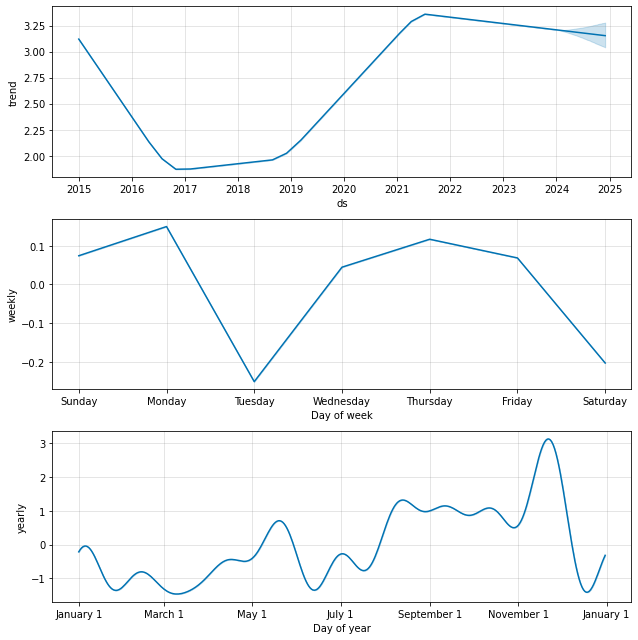

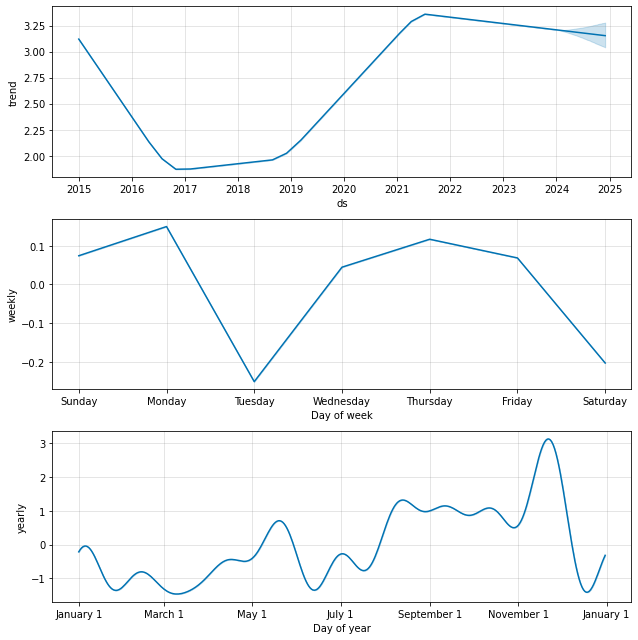

In [11]:
model.plot_components(predictions)